<a href="https://colab.research.google.com/github/nishannorunobi/linux_ge/blob/main/LinuxFileSystemGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: print hello world in python

print("Hello World!")


Hello World!


In [15]:
pip install node2vec


In [45]:
pip install network

In [44]:
pip install pydot

In [72]:
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout


In [73]:
G = nx.Graph()

In [81]:
edgelist = [
    ("/", "home"),
    ("/", "etc")
]

edgelist = edgelist + [
    ("etc", "network"),
    ("etc", "dev")
]

edgelist = edgelist + [
    ("home", "user1"),
    ("home", "user2")
]
G.add_edges_from(edgelist)
#G.add_edge('home','user1')
#G.add_edge('home','user2')

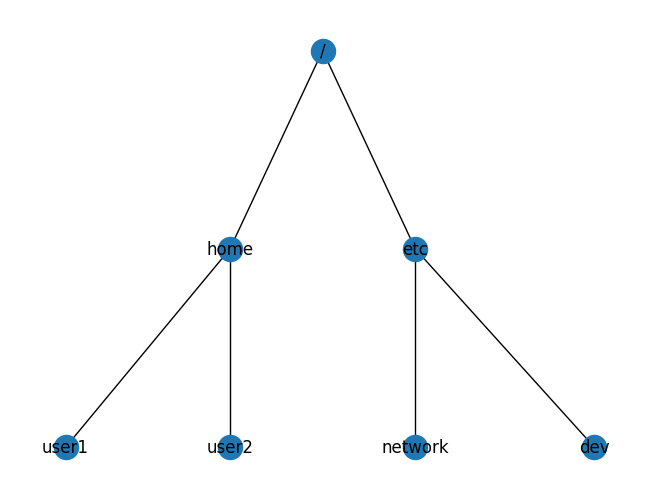

In [82]:

#T = nx.balanced_tree(2, 5)

pos = graphviz_layout(G, prog="dot")
nx.draw(G,pos, with_labels = True)

plt.show()

In [83]:
node2vec = Node2Vec(G, dimensions=64, walk_length=2, num_walks=20, workers=2)


Computing transition probabilities:   0%|          | 0/7 [00:00<?, ?it/s]